In [173]:
# All Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library to generate synthetic data
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Libraries for train test split, preprocessing and metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Import XGBoost model
from xgboost import XGBClassifier

In [174]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the shape of dataset
print("\n----- Dataset Shape -----")
print(df.shape)

# Display the first few rows
print("\n----- Dataset Head -----")
print(df.head())

# Display information about the dataset
print("\n----- Dataset Info -----")
df.info()

# Displey statstics about dataset
print("\n----- Dataset Description -----")
df.describe()


----- Dataset Shape -----
(944, 10)

----- Dataset Head -----
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8  

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [175]:
# Check for null values in data
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [176]:
# Check the distribution of the target variable ('Machine failure')
print("\nMachine Failure Distribution:")
print(df['fail'].value_counts())


Machine Failure Distribution:
fail
0    551
1    393
Name: count, dtype: int64


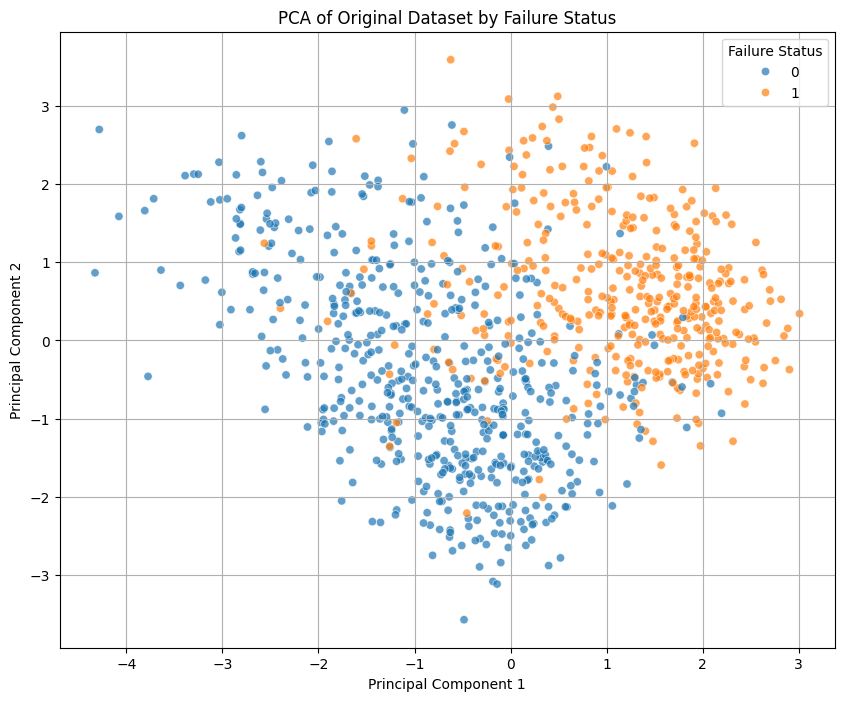

In [177]:
# Visulizing class distribution of original data using PCA
X_pca_orig = df.drop('fail', axis=1)
y_pca_orig = df['fail']

# Standardize the features
X_scaled = StandardScaler().fit_transform(X_pca_orig)

# Initialize and apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable to the PCA DataFrame for coloring the plot
pca_df['Target'] = y_pca_orig

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=pca_df, alpha=0.7)

plt.title('PCA of Original Dataset by Failure Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Failure Status')
plt.show()

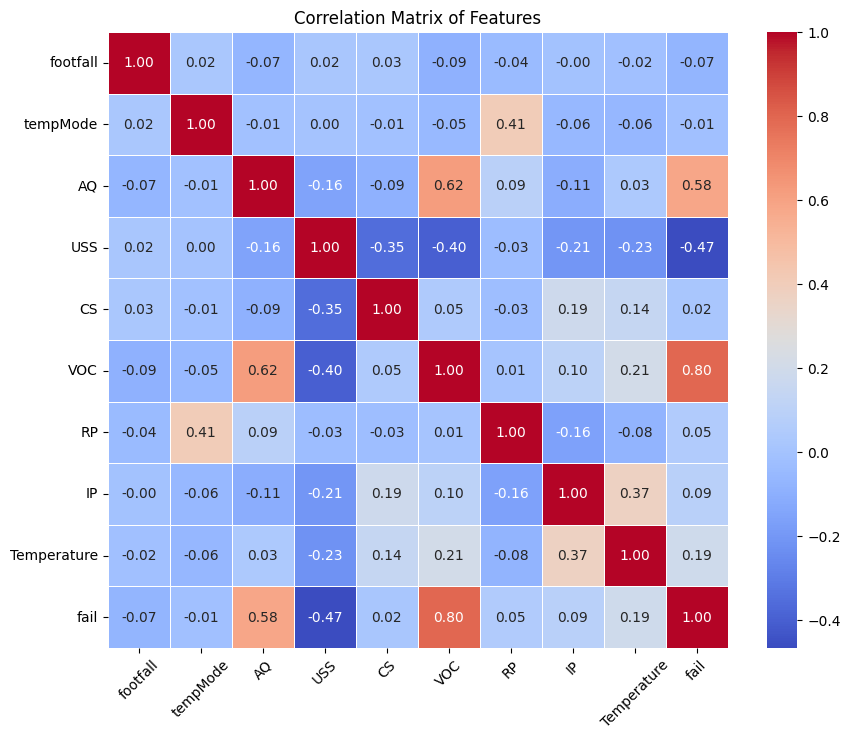

In [178]:
# Display heatmap of features on original data
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

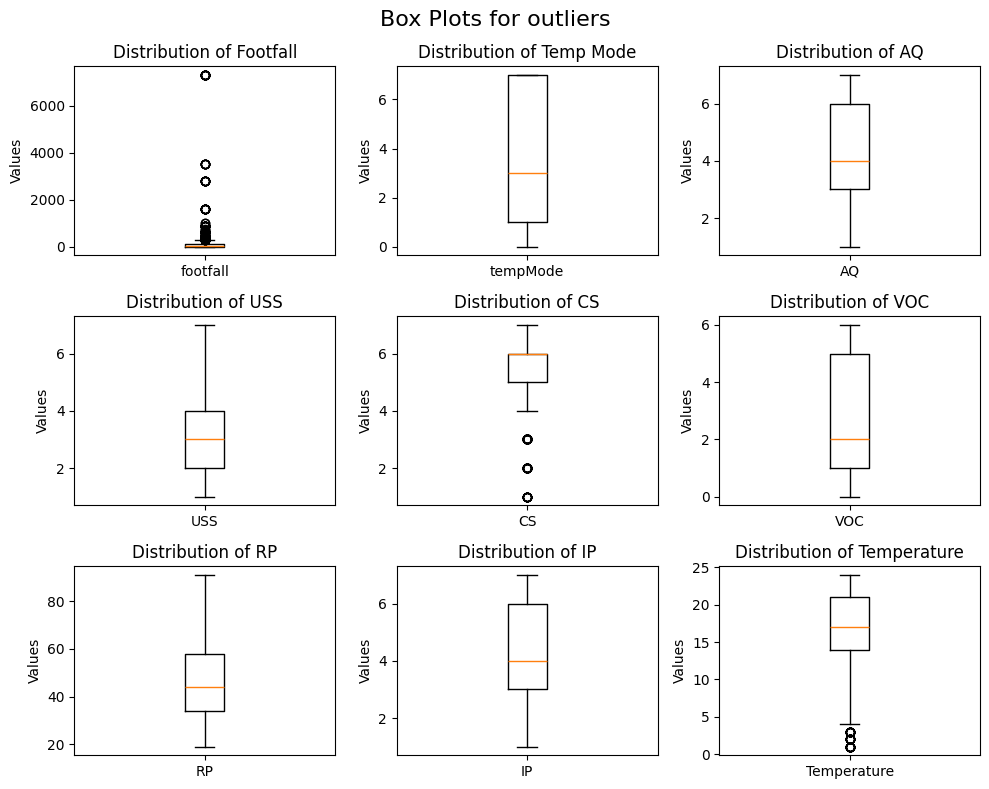

In [179]:
# Plot boxplot for outliers 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

ax1.boxplot(df['footfall'])
ax1.set_xticklabels(['footfall'])
ax1.set_title('Distribution of Footfall')
ax1.set_ylabel('Values')

ax2.boxplot(df['tempMode'])
ax2.set_xticklabels(['tempMode'])
ax2.set_title('Distribution of Temp Mode')
ax2.set_ylabel('Values')

ax3.boxplot(df['AQ'])
ax3.set_xticklabels(['AQ'])
ax3.set_title('Distribution of AQ')
ax3.set_ylabel('Values')

ax4.boxplot(df['USS'])
ax4.set_xticklabels(['USS'])
ax4.set_title('Distribution of USS')
ax4.set_ylabel('Values')

ax5.boxplot(df['CS'])
ax5.set_xticklabels(['CS'])
ax5.set_title('Distribution of CS')
ax5.set_ylabel('Values')

ax6.boxplot(df['VOC'])
ax6.set_xticklabels(['VOC'])
ax6.set_title('Distribution of VOC')
ax6.set_ylabel('Values')

ax7.boxplot(df['RP'])
ax7.set_xticklabels(['RP'])
ax7.set_title('Distribution of RP')
ax7.set_ylabel('Values')

ax8.boxplot(df['IP'])
ax8.set_xticklabels(['IP'])
ax8.set_title('Distribution of IP')
ax8.set_ylabel('Values')

ax9.boxplot(df['Temperature'])
ax9.set_xticklabels(['Temperature'])
ax9.set_title('Distribution of Temperature')
ax9.set_ylabel('Values')

fig.suptitle('Box Plots for outliers', fontsize=16)
plt.tight_layout()
plt.show()

In [180]:
# Performe data cleaning
#df.drop('footfall', axis=1, inplace=True)
df = df[(df['CS'] >= 4)]
df = df[(df['Temperature'] >= 6)]

In [181]:
# Saving cleaned data to csv file
df_cleaned = df
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [182]:
# Check the distribution of the target variable after data cleaning
print("----- Machine Failure Distribution -----")
print(df['fail'].value_counts())

# Shape of cleaned data
print("\n----- Data Shape -----")
print(df.shape)

----- Machine Failure Distribution -----
fail
0    427
1    360
Name: count, dtype: int64

----- Data Shape -----
(787, 10)


In [183]:
# Separate features (X) and target (y)
X = df_cleaned.drop('fail', axis=1)
y = df_cleaned['fail']

In [184]:
# Split the original data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Augment only the training set
# Combine X_train and y_train to easily filter for the synthesizer
train_data = pd.concat([X_train, y_train], axis=1)
minority_data_train = train_data[train_data['fail'] == 1]

In [185]:
# Calculate the number of samples needed to balance the training set
majority_count_train = y_train.value_counts()[0]
minority_count_train = y_train.value_counts()[1]
samples_to_create = majority_count_train - minority_count_train
print(samples_to_create)

46


In [194]:
# Generating synthetic data usign SDV
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=minority_data_train)
synthesizer = GaussianCopulaSynthesizer(metadata)

print(f"Fitting synthesizer on the {len(minority_data_train)} minority samples from the training set")
synthesizer.fit(minority_data_train)
    
print(f"Generating {samples_to_create} new synthetic samples")
synthetic_data = synthesizer.sample(num_rows=samples_to_create)
 
print(f"Successfully generated {len(synthetic_data)} new synthetic samples.")
print("\nSynthetic Data Head:")
print(synthetic_data.head())
synthetic_data.to_csv('synthetic_dataset.csv', index=False)

D:\CLG\python\Lib\site-packages\sdv\single_table\base.py:167: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

D:\CLG\python\Lib\site-packages\sdv\single_table\base.py:133: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Fitting synthesizer on the 252 minority samples from the training set
Generating 46 new synthetic samples
Successfully generated 46 new synthetic samples.

Synthetic Data Head:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0       111         7   6    1   5    4  60   4           22     1
1         1         6   7    1   5    6  41   7           17     1
2       131         3   5    1   6    6  32   5           24     1
3       162         1   6    1   7    5  25   7           19     1
4       830         7   5    3   6    5  63   6           21     1


In [193]:
# Combine original training data with new synthetic data
X_train_augmented = pd.concat([X_train, synthetic_data.drop('fail', axis=1)], ignore_index=True)
y_train_augmented = pd.concat([y_train, synthetic_data['fail']], ignore_index=True)

augmented_training_df = pd.concat([X_train_augmented, y_train_augmented], axis=1)
augmented_training_df.to_csv('augmented_dataset.csv', index=False)

In [188]:
# Standardize the features of combined data 
numerical_cols = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train_augmented[numerical_cols] = scaler.fit_transform(X_train_augmented[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [189]:
# Train the XGBoost model on both original and augmented data
# XGBoost on original data
xgb_orig = XGBClassifier(random_state=42)
xgb_orig.fit(X_train, y_train)
y_pred_xgb_orig = xgb_orig.predict(X_test)
print("----- XGBoost - Original Data -----")
print(classification_report(y_test, y_pred_xgb_orig))

# XGBoost on augmented data
xgb_aug = XGBClassifier(random_state=42)
xgb_aug.fit(X_train_augmented, y_train_augmented)
y_pred_xgb_aug = xgb_aug.predict(X_test)
print("\n----- XGBoost - Augmented Data -----")
print(classification_report(y_test, y_pred_xgb_aug))



----- XGBoost - Original Data -----
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       129
           1       0.95      0.76      0.85       108

    accuracy                           0.87       237
   macro avg       0.89      0.86      0.87       237
weighted avg       0.89      0.87      0.87       237


----- XGBoost - Augmented Data -----
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       129
           1       0.91      0.89      0.90       108

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237



Original data roc =  0.95
Augmented data roc =  0.96


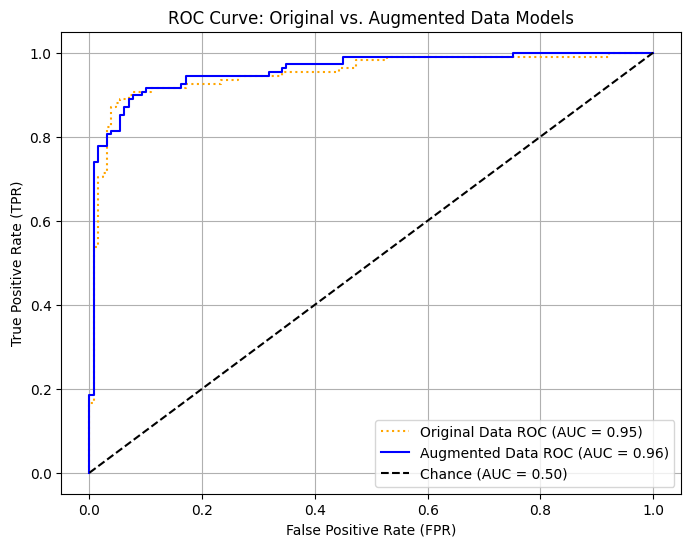

In [190]:
# Calculate Probabilities for Both Models

# Get predicted probabilities for the model trained on original data
y_pred_proba_orig = xgb_orig.predict_proba(X_test)[:, 1]

# Get predicted probabilities for the model trained on augmented data
y_pred_proba_aug = xgb_aug.predict_proba(X_test)[:, 1]

roc_orig = roc_auc_score(y_test, y_pred_proba_orig)
print(f'Original data roc = {roc_orig: .2f}')
roc_aug = roc_auc_score(y_test, y_pred_proba_aug)
print(f'Augmented data roc = {roc_aug: .2f}')

# Calculate ROC curve values and AUC Scores

# For original data model
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_pred_proba_orig)
auc_orig = roc_auc_score(y_test, y_pred_proba_orig)

# For augmented data model
fpr_aug, tpr_aug, _ = roc_curve(y_test, y_pred_proba_aug)
auc_aug = roc_auc_score(y_test, y_pred_proba_aug)


# Create the comparison plot
plt.figure(figsize=(8, 6))

# Plot the ROC curve for the original data model
plt.plot(fpr_orig, tpr_orig, color='orange', linestyle=':', label=f'Original Data ROC (AUC = {auc_orig:.2f})')

# Plot the ROC curve for the augmented data model
plt.plot(fpr_aug, tpr_aug, color='blue', linestyle='-', label=f'Augmented Data ROC (AUC = {auc_aug:.2f})')

# Plot the "chance" line
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')

plt.title('ROC Curve: Original vs. Augmented Data Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

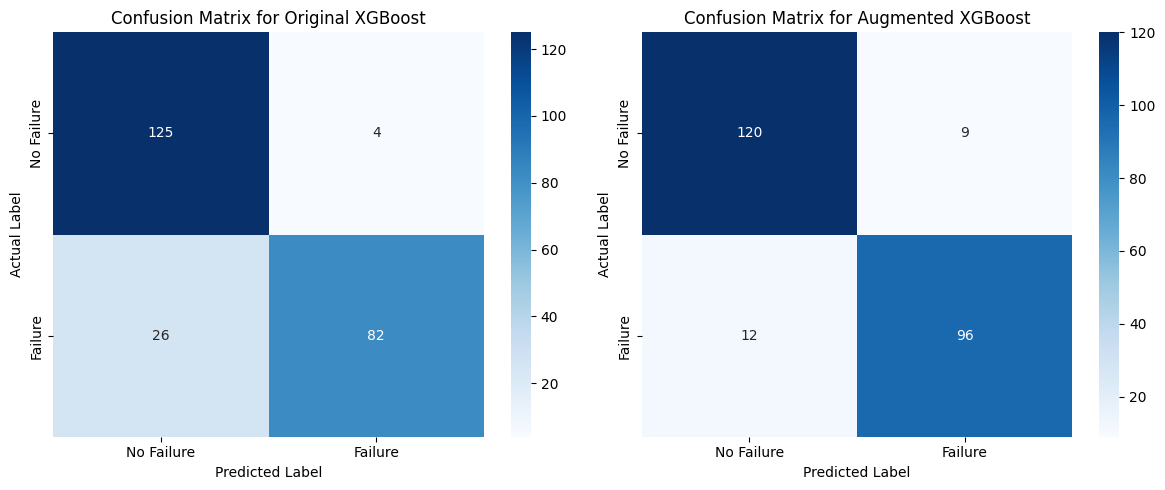

In [191]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

cm_orig = confusion_matrix(y_test, y_pred_xgb_orig)

#plt.figure(figsize=(6, 4))
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'], ax=ax1)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('Actual Label')
ax1.set_title('Confusion Matrix for Original XGBoost')

# Calculate the confusion matrix
cm_aug = confusion_matrix(y_test, y_pred_xgb_aug)

#plt.figure(figsize=(6, 4))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'], ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('Actual Label')
ax2.set_title('Confusion Matrix for Augmented XGBoost')

plt.tight_layout()
plt.show()


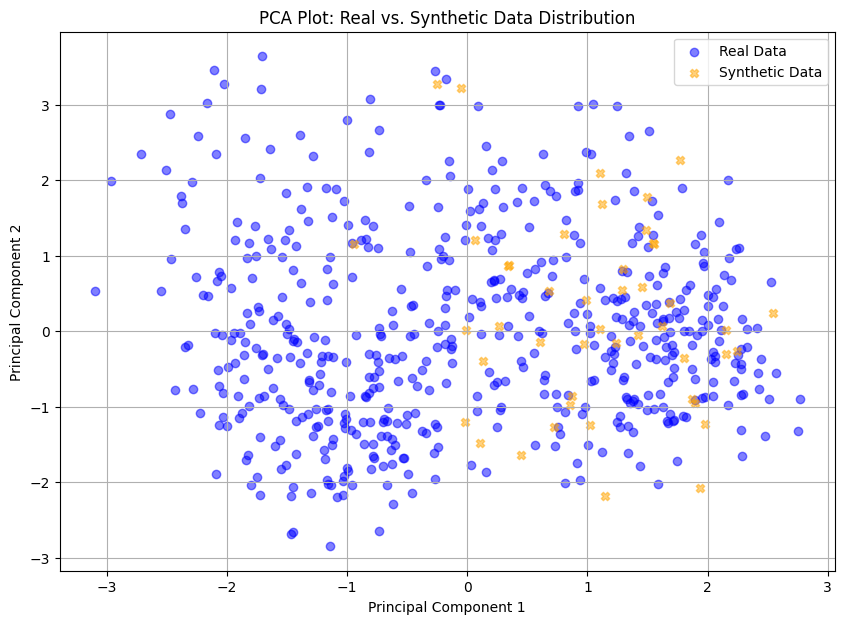

In [192]:
# Prepare synthetic data for PCA

# Copy the synthetic data to a new dataframe for preprocessing
synthetic_data_pca = synthetic_data.drop('fail', axis=1).copy()

# Apply the label encoder and standard scaler that were fitted on the training data
synthetic_data_pca[numerical_cols] = scaler.transform(synthetic_data_pca[numerical_cols])

# Apply PCA
pca = PCA(n_components=2)

# Fit the PCA model on the real training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Transform the synthetic data using the fitted PCA model
synthetic_data_pca_transformed = pca.transform(synthetic_data_pca)

# Create the Visualization
plt.figure(figsize=(10, 7))

# Create a scatter plot for the real data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, label='Real Data', c='blue')

# Create a scatter plot for the synthetic data on the same plot
plt.scatter(synthetic_data_pca_transformed[:, 0], synthetic_data_pca_transformed[:, 1], alpha=0.5, label='Synthetic Data', c='orange', marker='X')

plt.title('PCA Plot: Real vs. Synthetic Data Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()